In [1]:
from sklearn.datasets import load_files

reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("text_train의 타입:", type(text_train))
print("text_train의 길이:", len(text_train))
print("text_train[6]:\n", text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


- HTML 태그 제거

In [3]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [4]:
import  numpy as np
print("클래스별 샘플 수 (훈련 데이터):", np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [5]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("테스트 데이터의 문서 수 :", len(text_test))
print("클래스 별 샘플 수 (테스트 데이터):", np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]


테스트 데이터의 문서 수 : 25000
클래스 별 샘플 수 (테스트 데이터): [12500 12500]


In [6]:
bards_words = ["The fool doth think he is wise, ", 
                "but the wise man knows himself to be a fool"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [8]:
print("어휘 사전의 크기:", len(vect.vocabulary_))
print("어휘 사전의 내용:\n", vect.vocabulary_)


어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [9]:
bag_of_words = vect.transform(bards_words)
print("BOW:", repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [10]:
print("BOW의 밀집 표현:\n", bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [11]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성\n:", feature_names[:20])
print("20010에서 20030까지 특성:\n", feature_names[20010:20030])
print("매 200번째 특성:\n", feature_names[::2000])


특성 개수: 74849
처음 20개 특성
: ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 200번째 특성:
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("교차 검증 평균 점수: {:.2f}".format(np.mean(scores)))

교차 검증 평균 점수: 0.88


In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1 , 10]}
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 점수:0.89
최적의 매개변수:  {'C': 0.1}


In [19]:
X_test = vect.transform(text_test)
print("테스트 점수: {:.2f}".format(grid.score(X_test,y_test)))

테스트 점수: 0.88


In [15]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("min_df로 제한한 X_train:", repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [16]:
feature_names = vect.get_feature_names()

print("처음 50개 특성:\n", feature_names[:50])
print("20,010부터 20,030까지 특성:\n", feature_names[20010:20030])
print("매 700번째 특성:\n", feature_names[::700])



처음 50개 특성:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20,010부터 20,030까지 특성:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient',

c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)

In [18]:
grid.fit(X_train, y_train)
print("최적의 교차 검증 점수: {:.2f}.format(grid.best_score_) ")

최적의 교차 검증 점수: {:.2f}.format(grid.best_score_) 


In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("불용어 개수:", len(ENGLISH_STOP_WORDS))
print("매 10번째 불용어:\n", list(ENGLISH_STOP_WORDS)[::10])


불용어 개수: 318
매 10번째 불용어:
 ['detail', 'when', 'eg', 'interest', 'however', 'him', 'most', 'towards', 'where', 'you', 'hereby', 'but', 'behind', 'until', 'etc', 'be', 'we', 'cannot', 'afterwards', 'therefore', 'so', 'thereafter', 'whenever', 'front', 'all', 'anyone', 'something', 'over', 'found', 'least', 'hereafter', 'become']


In [20]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train:\n', repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [21]:
grid = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))

최상의 교차 검증 점수: 0.88


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C':[0.001,0.01,0.1,1,10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))

최상의 교차 검증 점수:0.89


In [23]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print("가장 낮은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[:20]])
print("가장 높은 tfidf를 가진 특성:\n", feature_names[sorted_by_tfidf[-20:]])


가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("가장 낮은 idf를 가진 특성:\n", feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


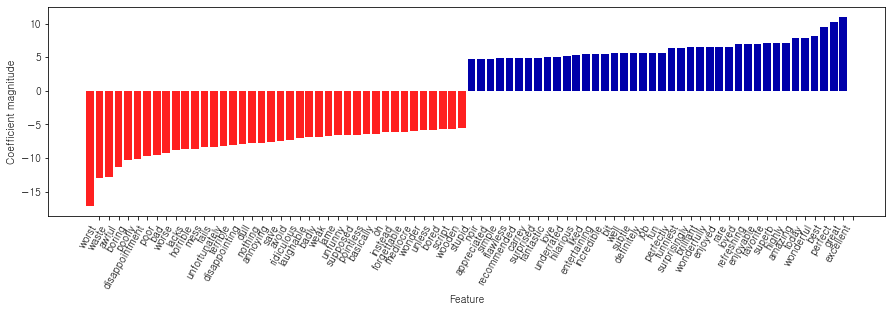

In [27]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#한글꺠짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_[0], feature_names, n_top_features=40)

In [28]:
print("bards_words:\n", bards_words)


bards_words:
 ['The fool doth think he is wise, ', 'but the wise man knows himself to be a fool']


In [29]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전\n", cv.get_feature_names())


어휘 사전 크기: 13
어휘 사전
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print("변환된 데이터 (밀집배열):\n", cv.transform(bards_words).toarray())

변환된 데이터 (밀집배열):
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [33]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("어휘 사전 크기:", len(cv.vocabulary_))
print("어휘 사전:\n", cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


c:\Users\82109\anaconda3\envs\MLwithPython3.8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression(max_iter=5000))
param_grid = {'logisticregression__C':[0.001, 0.01, 0.1, 1, 10, 100], 'tfidfvectorizer__ngram_range':[(1,1),(1,2),(1,3)]}

grid = GridSearchCV(pipe, param_grid, cv = 5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수:{:.2f}'.format(grid.best_score_))
print("최적의 매개변수\n", grid.best_params_)


최상의 교차 검증 점수:0.91
최적의 매개변수
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


In [ ]:
scores = grid.cv_results_['mean_test_score'].reshape(-1,3).T

heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap='viridis', fmt='%.3f',
    xticklabels=param_grid['logisticregression__C'],
    yticklabels=param_grid['tfidfvectorizer__ngram_range']
)
plt.colorbar(heatmap)

In [ ]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

: 